<a href="https://colab.research.google.com/github/dhar9571/Black_Friday_Dataset-EDA_and_FeatureEngineering/blob/main/EDA_and_Feature_Engineering_Project_Black_Friday_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Feature Engineering - Black Friday Dataset

## Feature Engineering

In [62]:
# Mounting google drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Importing required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Loading the Dataset:

train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Black Friday Dataset/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Black Friday Dataset/test.csv")

In [66]:
# Train Dataset first view:

train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [67]:
# Test Dataset first view:

test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [68]:
# Appending Train and Test datasets:

df = train_df.append(test_df)
df.head()

<ipython-input-68-f54f9a8bd6a3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [69]:
# Dataset information:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [70]:
# Dataset describe:

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [71]:
# Deleting user_id column (contain unique identifier for each observation) as it is not usable:

df.drop(columns=["User_ID"],axis=1,inplace=True)

In [ ]:
# Deleting product_id column (contain unique identifier for each observation) as it is not usable:

df.drop(columns=["Product_ID"],axis=1,inplace=True)

In [72]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


Handling Categorical feature "Gender":

In [73]:
# Converting Gender column values "M" and "F" to 1 and 0 for model:

df["Gender"] = df["Gender"].map({"M":1,"F":0})

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


Handling Categorical feature "Age":

In [74]:
# Checking unique values of the column:

df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [75]:
# Assigning 1-7 numbers to these groups:

df["Age"]=df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


Handling Categorical feature "City_Category":

In [76]:
# Assigning numerical values to the column values:

city_df = pd.get_dummies(df["City_Category"],drop_first=True)
city_df.head(2)

,B,C
0,0,0
1,0,0


In [77]:
# Concating the two dataframe to add the columns to original dataframe:

df = pd.concat([df,city_df],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [78]:
# Dropping "City_Category" column as it is not required:

df.drop(["City_Category"],axis=1,inplace=True)

df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


Handling Missing Values:

In [79]:
# Checking Missing Values:

df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [80]:
# Purchase column has null values which belongs to the Test data, therefore, it is not required to be replaced or removed.

# Product_Category_2 and Product_Category_3 columns has a lot of null values which needs to be handled correctly:

#Checking unique values in "Product_Category_2" column

df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [81]:
# Checking the value counts of "Product_Category_2" column:

df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [83]:
#Replacing the null values of "Product_Category_2" column with the Mode(8.0):

df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0],inplace=True)

In [84]:
# Again checking null values in "Product_Category_2" column to verify:

df["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [85]:
# Similary, replacing all the null values of "Product_Category_3" column with the mode:

# Checking unique values:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [86]:
# Checking value counts:

df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [87]:
# replacing all the null values with Mode(16.0)

df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0],inplace=True)

df["Product_Category_3"].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

Handling values of "Stay_In_Current_City_Years" column

In [88]:
# Checking unique values:

df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [91]:
# Replacing '4+' with "4" as every value above 4 will be counted in this:

df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+',"")

<ipython-input-91-f66fdab7e6cb>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+',"")


In [92]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [93]:
# Checking dataframe info:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [95]:
# in "Stay_In_Current_City_Years" column, we have numerical values such as 0,1,2,3,4 but still the data type is showing as object.

#Therefore, converting these values' datatype to integer:

df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

# Also converting the datatype of "B" and "C" columns from "uint8" to integer:

df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


## Visualizations

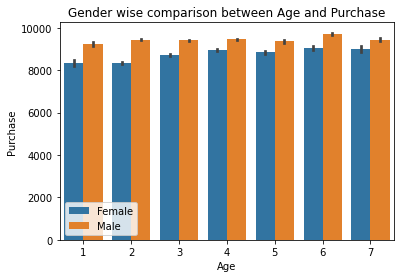

In [103]:
# Creating a Barplot for Age vs Purchase comparison:

ax = sns.barplot(x=df["Age"],y=df["Purchase"],data=df,hue=df["Gender"])

# get the legend object
legend = ax.legend()

# rename the legends
legend.texts[0].set_text("Female")
legend.texts[1].set_text("Male")

plt.title("Gender wise comparison between Age and Purchase")
plt.show()

Observation: 

1. Purchase among different age groups are almost same.
2. Overall Male has more purchases comparing to Female.

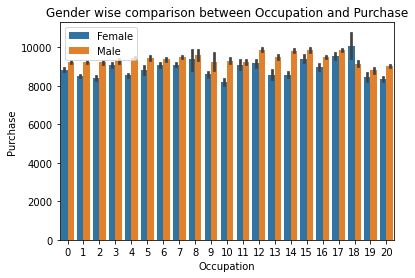

In [104]:
# Creating a Barplot for Occupation vs Purchase comparison:

ax = sns.barplot(x=df["Occupation"],y=df["Purchase"],data=df,hue=df["Gender"])

# get the legend object
legend = ax.legend()

# rename the legends
legend.texts[0].set_text("Female")
legend.texts[1].set_text("Male")

plt.title("Gender wise comparison between Occupation and Purchase")
plt.show()

Observation: The distribution is uniform. Therefore, it does not affect much.

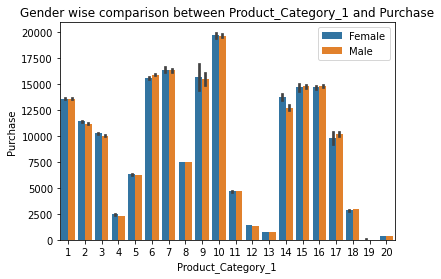

In [105]:
# Creating a Barplot for Product_Category_1 vs Purchase comparison:

ax = sns.barplot(x=df["Product_Category_1"],y=df["Purchase"],data=df,hue=df["Gender"])

# get the legend object
legend = ax.legend()

# rename the legends
legend.texts[0].set_text("Female")
legend.texts[1].set_text("Male")

plt.title("Gender wise comparison between Product_Category_1 and Purchase")
plt.show()

Observation:
1. Male and Female have almost equal number of purchases.
2. 10, 7, 6, 9, 15, 16 are the top Product_Category_1 in terms of most purchases.

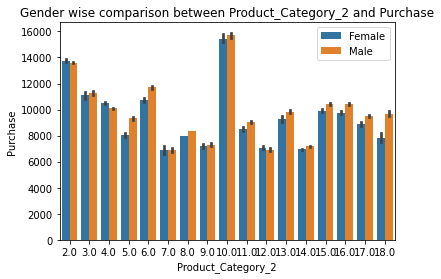

In [106]:
# Creating a Barplot for Product_Category_2 vs Purchase comparison:

ax = sns.barplot(x=df["Product_Category_2"],y=df["Purchase"],data=df,hue=df["Gender"])

# get the legend object
legend = ax.legend()

# rename the legends
legend.texts[0].set_text("Female")
legend.texts[1].set_text("Male")

plt.title("Gender wise comparison between Product_Category_2 and Purchase")
plt.show()

Observation:
1. Male and Female have almost equal number of purchases.
2. 10, 2, 3, 6, 4, 15, 16 are the top Product_Category_2 in terms of most purchases.

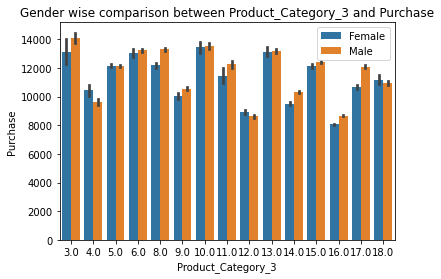

In [107]:
# Creating a Barplot for Product_Category_3 vs Purchase comparison:

ax = sns.barplot(x=df["Product_Category_3"],y=df["Purchase"],data=df,hue=df["Gender"])

# get the legend object
legend = ax.legend()

# rename the legends
legend.texts[0].set_text("Female")
legend.texts[1].set_text("Male")

plt.title("Gender wise comparison between Product_Category_3 and Purchase")
plt.show()

Observation:

1. Male and Female have almost equal number of purchases.
2. 10, 3, 6, 8, 13, 15 are the top Product_Category_3 in terms of most purchases.

In [108]:
df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


## Feature Scaling

In [110]:
# Creating seperate datasets for train and test:

test_df = df[df["Purchase"].isna()]
train_df = df[~df["Purchase"].isna()]

In [114]:
test_df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1


In [115]:
train_df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


In [117]:
# Dropping "Purchase" column:

X=train_df.drop('Purchase',axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [119]:
# Checking shape of X dataframe:

X.shape

(550068, 11)

In [121]:
# Creating another Series with "Purchase" column:

y=train_df['Purchase']

In [122]:
# Checking shape of y dataframe:

y.shape

(550068,)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [124]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [125]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Now we can train our model :)